In [1]:
import pandas as pd

df = pd.read_csv('data/NASA-POWER_CLEANED.csv')

print(df.head())
print(df.columns)

   YEAR  MO  DY  CLRSKY_SFC_SW_DWN    T2M  ALLSKY_SFC_SW_DWN   RH2M  WS2M  \
0  2020   1   1               6.35  26.84               4.35  81.59  1.95   
1  2020   1   2               6.30  26.48               2.57  88.40  1.56   
2  2020   1   3               6.33  26.61               3.18  84.16  1.68   
3  2020   1   4               6.57  26.58               4.33  80.04  1.98   
4  2020   1   5               6.49  26.51               4.57  79.85  1.85   

   ALLSKY_SFC_LW_DWN  PRECTOTCORR  
0               9.70         0.60  
1               9.76        13.78  
2               9.51         4.29  
3               9.38         0.18  
4               9.49         0.24  
Index(['YEAR', 'MO', 'DY', 'CLRSKY_SFC_SW_DWN', 'T2M', 'ALLSKY_SFC_SW_DWN',
       'RH2M', 'WS2M', 'ALLSKY_SFC_LW_DWN', 'PRECTOTCORR'],
      dtype='object')


In [2]:
print(df.describe())

print(df.isna().sum())

              YEAR           MO           DY  CLRSKY_SFC_SW_DWN          T2M  \
count  1675.000000  1675.000000  1675.000000        1675.000000  1675.000000   
mean   2021.818507     6.207164    15.733731           6.968979    27.865528   
std       1.337544     3.407343     8.801245           0.378499     0.816078   
min    2020.000000     1.000000     1.000000           5.930000    25.070000   
25%    2021.000000     3.000000     8.000000           6.715000    27.365000   
50%    2022.000000     6.000000    16.000000           7.050000    27.950000   
75%    2023.000000     9.000000    23.000000           7.240000    28.410000   
max    2024.000000    12.000000    31.000000           9.140000    30.510000   

       ALLSKY_SFC_SW_DWN         RH2M         WS2M  ALLSKY_SFC_LW_DWN  \
count        1675.000000  1675.000000  1675.000000        1675.000000   
mean            5.019725    79.571164     1.512609           9.743970   
std             1.084162     3.853669     0.352027          

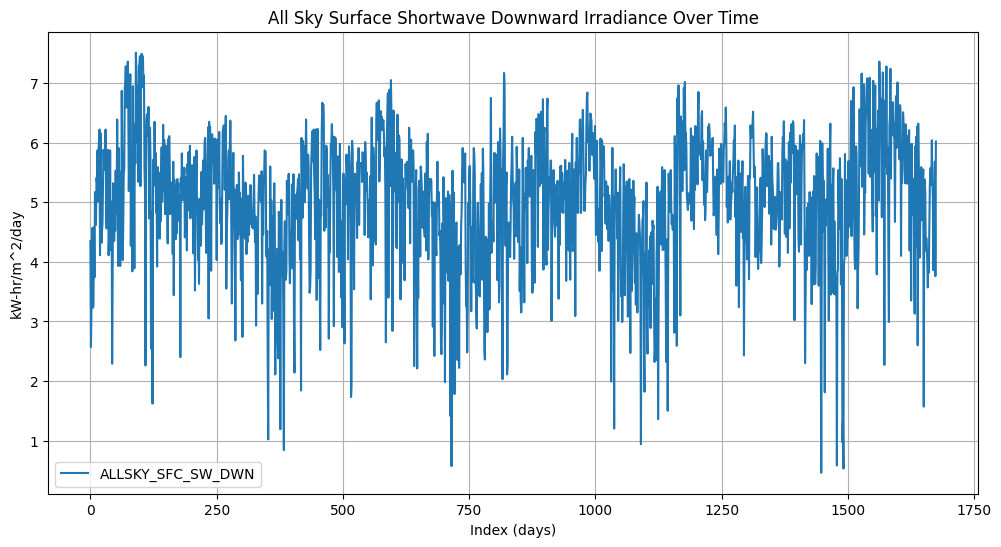

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['ALLSKY_SFC_SW_DWN'], label='ALLSKY_SFC_SW_DWN')
plt.xlabel('Index (days)')
plt.ylabel('kW-hr/m^2/day')
plt.title('All Sky Surface Shortwave Downward Irradiance Over Time')
plt.legend()
plt.grid(True)
plt.show()

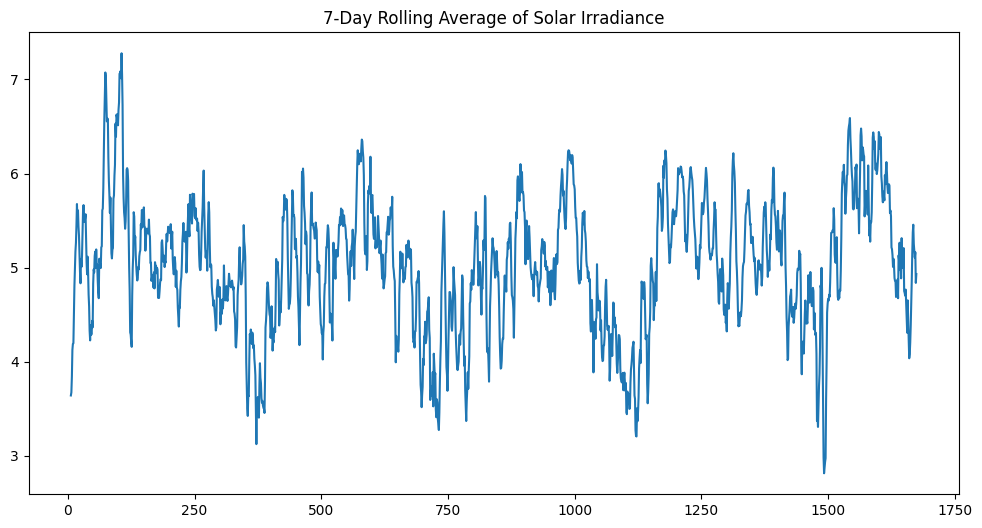

In [4]:
df['ALLSKY_SFC_SW_DWN_rolling'] = df['ALLSKY_SFC_SW_DWN'].rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(df.index, df['ALLSKY_SFC_SW_DWN_rolling'])
plt.title('7-Day Rolling Average of Solar Irradiance')
plt.show()


In [8]:
import pandas as pd

df_cleaned = pd.read_csv('data/NASA-POWER_CLEANED.csv')

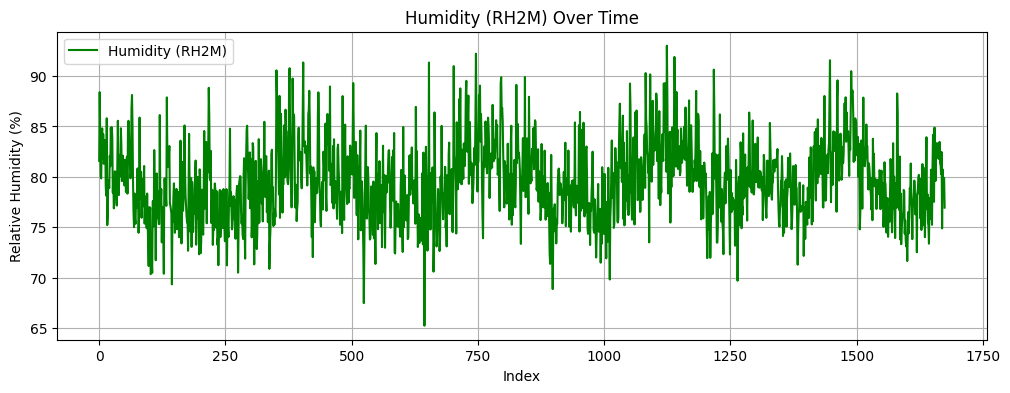

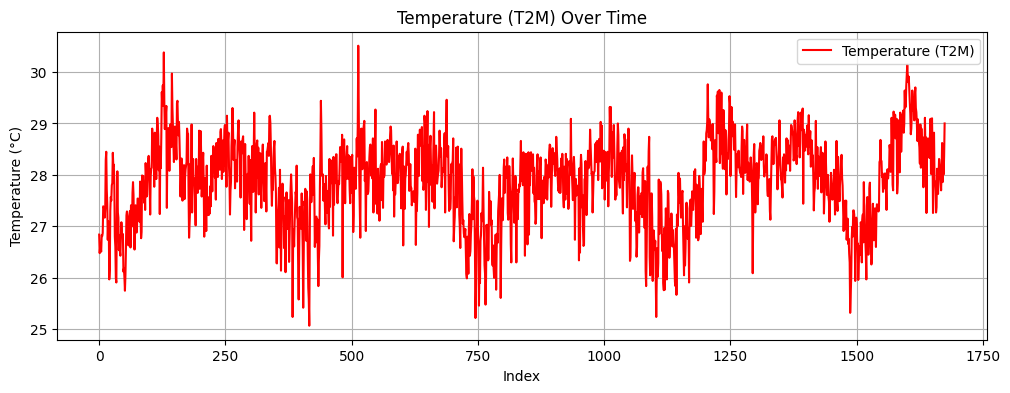

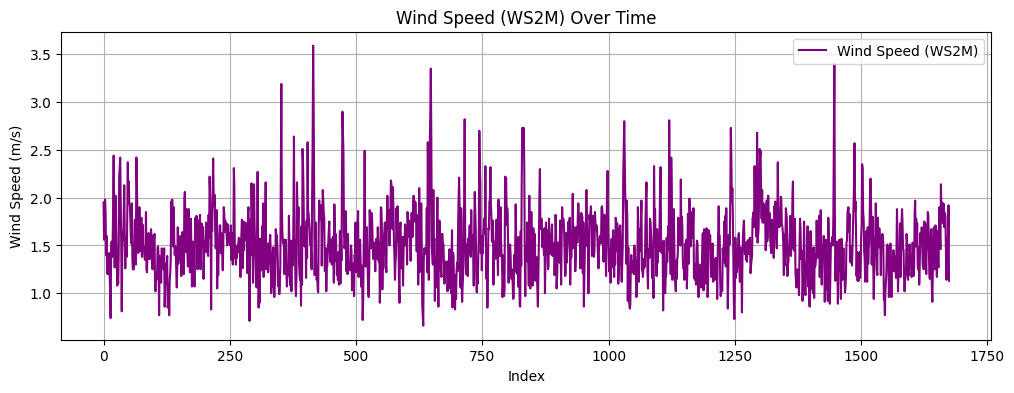

In [9]:
import matplotlib.pyplot as plt

# Plot humidity (RH2M)
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned['RH2M'], label='Humidity (RH2M)', color='green')
plt.title('Humidity (RH2M) Over Time')
plt.xlabel('Index')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plot temperature (T2M)
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned['T2M'], label='Temperature (T2M)', color='red')
plt.title('Temperature (T2M) Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot wind speed (WS2M)
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned['WS2M'], label='Wind Speed (WS2M)', color='purple')
plt.title('Wind Speed (WS2M) Over Time')
plt.xlabel('Index')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


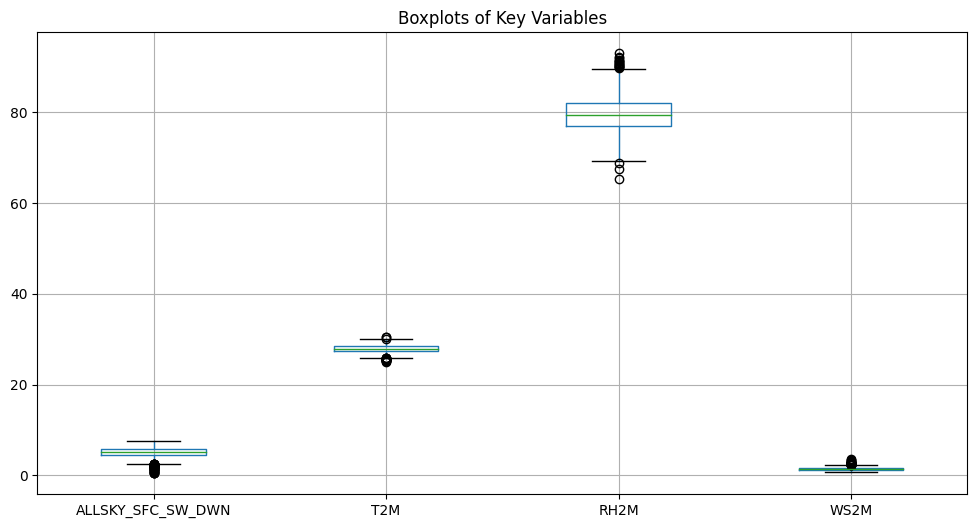

In [11]:
plt.figure(figsize=(12,6))
df.boxplot(column=['ALLSKY_SFC_SW_DWN', 'T2M', 'RH2M', 'WS2M'])
plt.title('Boxplots of Key Variables')
plt.show()

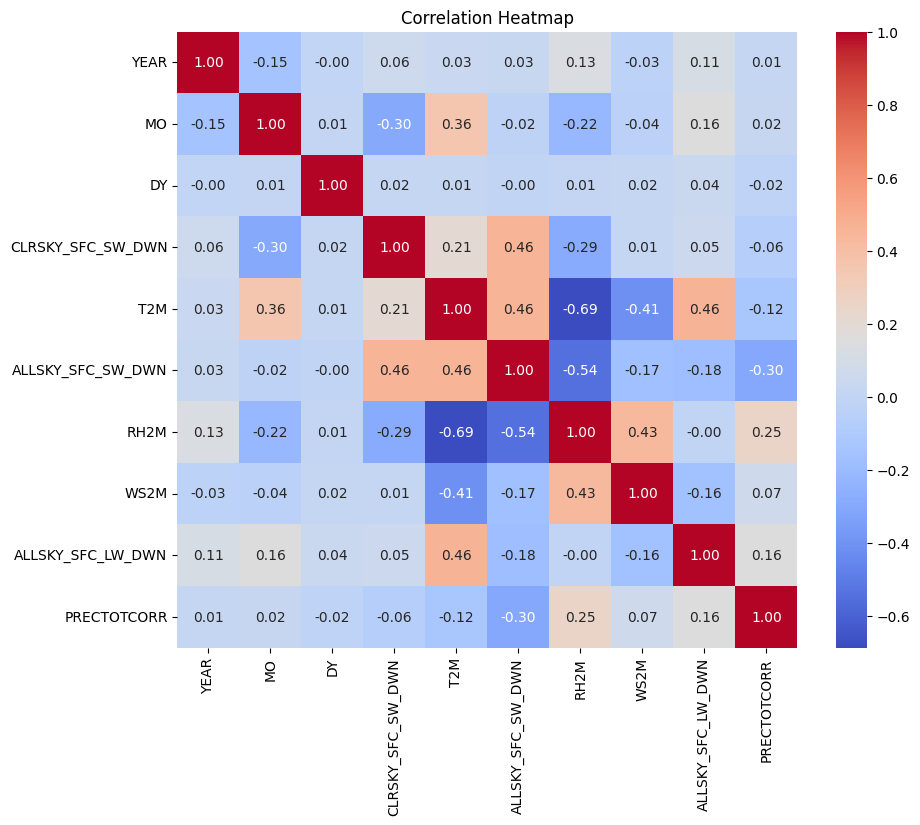

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Data Preparation for LSTM/ANN Modeling

In [12]:
features = ['T2M', 'RH2M', 'WS2M', 'ALLSKY_SFC_LW_DWN', 'CLRSKY_SFC_SW_DWN', 'PRECTOTCORR']
target = 'ALLSKY_SFC_SW_DWN'

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

import numpy as np
scaled_df = pd.DataFrame(scaled_data, columns=features + [target])
print(scaled_df.head())

        T2M      RH2M      WS2M  ALLSKY_SFC_LW_DWN  CLRSKY_SFC_SW_DWN  \
0  0.325368  0.588829  0.440273           0.517986           0.130841   
1  0.259191  0.834234  0.307167           0.561151           0.115265   
2  0.283088  0.681441  0.348123           0.381295           0.124611   
3  0.277574  0.532973  0.450512           0.287770           0.199377   
4  0.264706  0.526126  0.406143           0.366906           0.174455   

   PRECTOTCORR  ALLSKY_SFC_SW_DWN  
0     0.005447           0.551773  
1     0.125091           0.299291  
2     0.038943           0.385816  
3     0.001634           0.548936  
4     0.002179           0.582979  


In [14]:
def create_sequences(data, target_col, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size][features].values)
        y.append(data.iloc[i+window_size][target_col])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_df, target, window_size=30)
print('Input shape:', X.shape)
print('Target shape:', y.shape)

Input shape: (1645, 30, 6)
Target shape: (1645,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    shuffle=False       
)

print('Train X shape:', X_train.shape)
print('Test X shape:', X_test.shape)
print('Train y shape:', y_train.shape)
print('Test y shape:', y_test.shape)

Train X shape: (1316, 30, 6)
Test X shape: (329, 30, 6)
Train y shape: (1316,)
Test y shape: (329,)


Build the LSTM Model

In [17]:
%pip install tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 3.7 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: protobuf
    Found exist

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(30, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100
42/42 [==============================] - 2s 17ms/step - loss: 0.1501 - mae: 0.3116 - val_loss: 0.0261 - val_mae: 0.1210
Epoch 2/100
42/42 [==============================] - 1s 12ms/step - loss: 0.0309 - mae: 0.1383 - val_loss: 0.0263 - val_mae: 0.1288
Epoch 3/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0278 - mae: 0.1295 - val_loss: 0.0232 - val_mae: 0.1186
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0282 - mae: 0.1308 - val_loss: 0.0231 - val_mae: 0.1196
Epoch 5/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0289 - mae: 0.1337 - val_loss: 0.0224 - val_mae: 0.1155
Epoch 6/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0283 - mae: 0.1316 - val_loss: 0.0239 - val_mae: 0.1230
Epoch 7/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0266 - mae: 0.1264 - val_loss: 0.0221 - val_mae: 0.1140
Epoch 8/100
42/42 [==============================] - 1s 15ms/step - loss: 0.

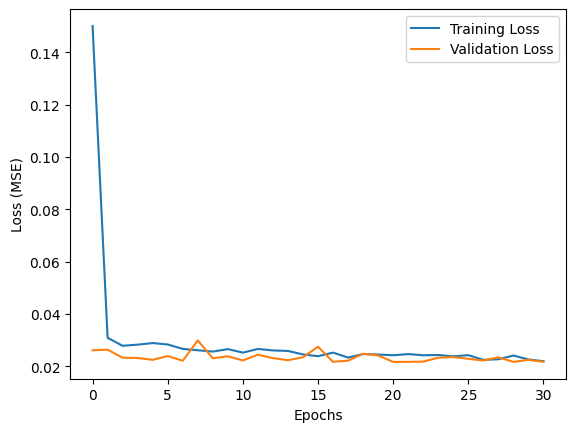

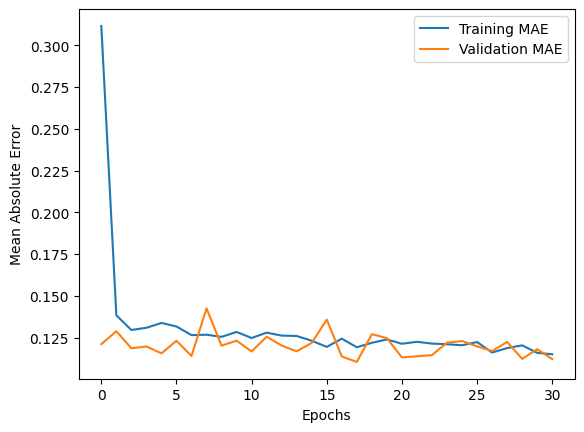

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [37]:
y_pred_lstm_flat = y_pred.flatten()
y_test_flat = y_test.flatten()

dummy_feature = np.zeros((X_test.shape[0], 1))

X_test_last_features = X_test[:, -1, :-1]

inverse_input_pred_lstm = np.hstack([X_test_last_features, dummy_feature, y_pred_lstm_flat.reshape(-1, 1)])
inverse_input_true = np.hstack([X_test_last_features, dummy_feature, y_test_flat.reshape(-1, 1)])

inverse_pred_lstm = scaler.inverse_transform(inverse_input_pred_lstm)[:, -1]
inverse_true = scaler.inverse_transform(inverse_input_true)[:, -1]


In [22]:
y_pred = model_lstm.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

11/11 [==============================] - 0s 6ms/step
Test MAE: 0.11308178197733916
Test RMSE: 0.14709676933130092


In [24]:
import numpy as np

y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

dummy_feature = np.zeros((X_test.shape[0], 1))

inverse_input_pred = np.hstack([X_test_last_features, dummy_feature, y_pred_reshaped])
inverse_input_true = np.hstack([X_test_last_features, dummy_feature, y_test_reshaped])

inverse_pred = scaler.inverse_transform(inverse_input_pred)[:, -1]
inverse_true = scaler.inverse_transform(inverse_input_true)[:, -1]

real_mae = np.mean(np.abs(inverse_true - inverse_pred))
real_rmse = np.sqrt(np.mean((inverse_true - inverse_pred)**2))

print("Real-world MAE:", real_mae)
print("Real-world RMSE:", real_rmse)


Real-world MAE: 0.7972265629402411
Real-world RMSE: 1.0370322237856713


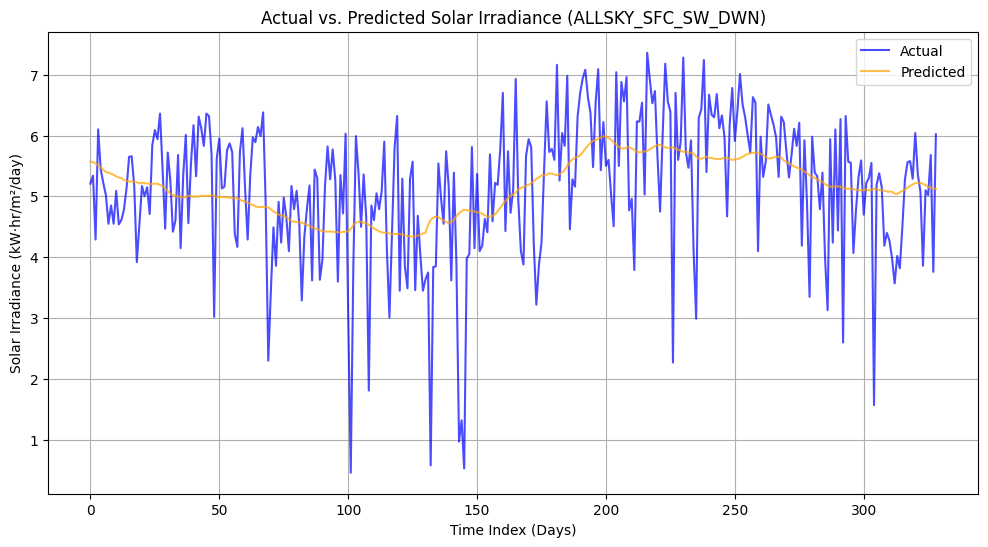

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(inverse_true, label='Actual', color='blue', alpha=0.7)
plt.plot(inverse_pred, label='Predicted', color='orange', alpha=0.7)
plt.title('Actual vs. Predicted Solar Irradiance (ALLSKY_SFC_SW_DWN)')
plt.xlabel('Time Index (Days)')
plt.ylabel('Solar Irradiance (kW·hr/m²/day)')
plt.legend()
plt.grid(True)
plt.show()

Build the ANN Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model_ann = Sequential()
model_ann.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))  # flatten time-step dimension
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(1))  # single output

model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop_ann = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_ann = model_ann.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_ann],
    verbose=1
)


Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1318 - val_loss: 0.0251 - val_mae: 0.1258
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0236 - val_mae: 0.1215
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0197 - mae: 0.1078 - val_loss: 0.0257 - val_mae: 0.1213
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0192 - mae: 0.1054 - val_loss: 0.0233 - val_mae: 0.1198
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0185 - mae: 0.1046 - val_loss: 0.0235 - val_mae: 0.1204
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0177 - mae: 0.1018 - val_loss: 0.0236 - val_mae: 0.1174
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0172 - mae: 0.0998 - val_loss: 0.0235 - val_mae: 0.1184
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0184 - m

In [33]:
y_pred_ann = model_ann.predict(X_test).flatten()  # flatten to (329,)
y_test_flat = y_test.flatten()                    # ensure it’s also (329,)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_ann = mean_absolute_error(y_test_flat, y_pred_ann)
rmse_ann = mean_squared_error(y_test_flat, y_pred_ann, squared=False)

print("ANN Test MAE:", mae_ann)
print("ANN Test RMSE:", rmse_ann)



11/11 [==============================] - 0s 987us/step
ANN Test MAE: 0.11596337880874762
ANN Test RMSE: 0.15086474168083133


In [34]:
import numpy as np

y_pred_ann_flat = y_pred_ann.flatten()
y_test_flat = y_test.flatten()

dummy_feature = np.zeros((X_test.shape[0], 1))

X_test_last_features = X_test[:, -1, :-1]

inverse_input_pred = np.hstack([X_test_last_features, dummy_feature, y_pred_ann_flat.reshape(-1,1)])
inverse_input_true = np.hstack([X_test_last_features, dummy_feature, y_test_flat.reshape(-1,1)])

inverse_pred_ann = scaler.inverse_transform(inverse_input_pred)[:, -1]
inverse_true_ann = scaler.inverse_transform(inverse_input_true)[:, -1]

real_mae_ann = np.mean(np.abs(inverse_true_ann - inverse_pred_ann))
real_rmse_ann = np.sqrt(np.mean((inverse_true_ann - inverse_pred_ann)**2))

print("ANN Real-world MAE:", real_mae_ann)
print("ANN Real-world RMSE:", real_rmse_ann)


ANN Real-world MAE: 0.8175418206016707
ANN Real-world RMSE: 1.0635964288498607


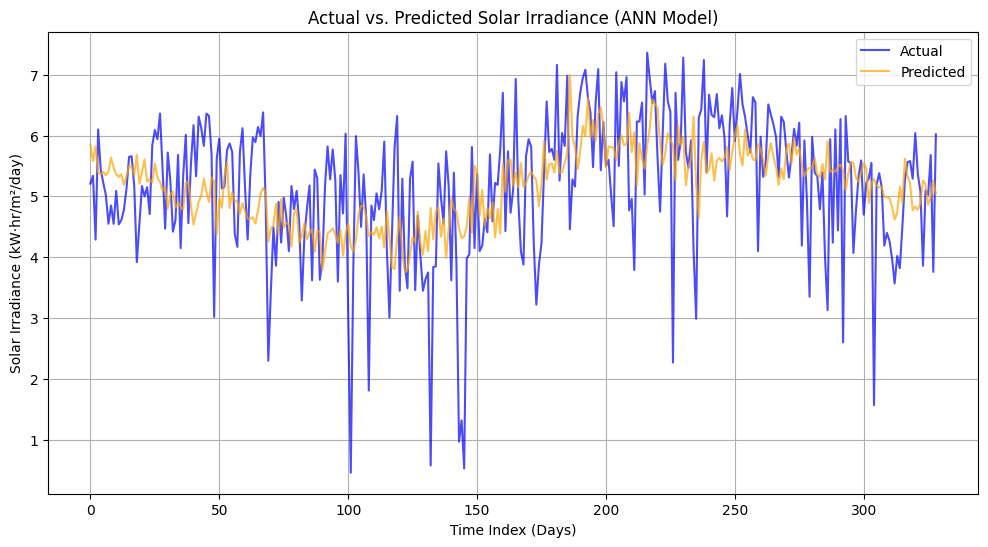

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(inverse_true_ann, label='Actual', color='blue', alpha=0.7)
plt.plot(inverse_pred_ann, label='Predicted', color='orange', alpha=0.7)
plt.title('Actual vs. Predicted Solar Irradiance (ANN Model)')
plt.xlabel('Time Index (Days)')
plt.ylabel('Solar Irradiance (kW·hr/m²/day)')
plt.legend()
plt.grid(True)
plt.show()


LSTM AND ANN Comparison

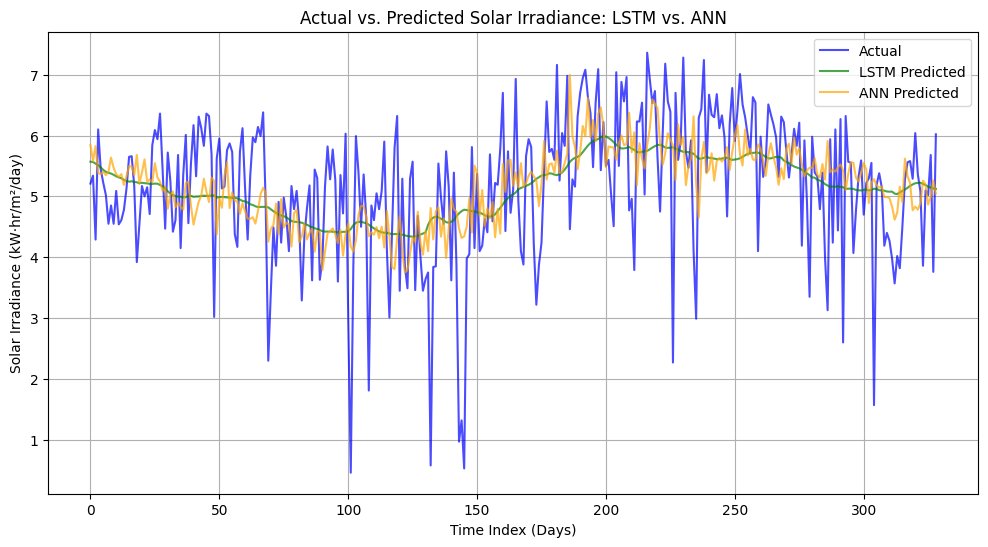

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(inverse_true, label='Actual', color='blue', alpha=0.7)
plt.plot(inverse_pred_lstm, label='LSTM Predicted', color='green', alpha=0.7)
plt.plot(inverse_pred_ann, label='ANN Predicted', color='orange', alpha=0.7)
plt.title('Actual vs. Predicted Solar Irradiance: LSTM vs. ANN')
plt.xlabel('Time Index (Days)')
plt.ylabel('Solar Irradiance (kW·hr/m²/day)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# LSTM inverse transform and real-world metrics
y_pred_lstm_flat = y_pred.flatten()
y_test_flat = y_test.flatten()

dummy_feature = np.zeros((X_test.shape[0], 1))
X_test_last_features = X_test[:, -1, :-1]

inverse_input_pred_lstm = np.hstack([X_test_last_features, dummy_feature, y_pred_lstm_flat.reshape(-1, 1)])
inverse_input_true = np.hstack([X_test_last_features, dummy_feature, y_test_flat.reshape(-1, 1)])

inverse_pred_lstm = scaler.inverse_transform(inverse_input_pred_lstm)[:, -1]
inverse_true = scaler.inverse_transform(inverse_input_true)[:, -1]

real_mae_lstm = np.mean(np.abs(inverse_true - inverse_pred_lstm))
real_rmse_lstm = np.sqrt(np.mean((inverse_true - inverse_pred_lstm) ** 2))

# ⚡️ ANN inverse transform and real-world metrics
y_pred_ann_flat = y_pred_ann.flatten()

inverse_input_pred_ann = np.hstack([X_test_last_features, dummy_feature, y_pred_ann_flat.reshape(-1, 1)])

inverse_pred_ann = scaler.inverse_transform(inverse_input_pred_ann)[:, -1]

real_mae_ann = np.mean(np.abs(inverse_true - inverse_pred_ann))
real_rmse_ann = np.sqrt(np.mean((inverse_true - inverse_pred_ann) ** 2))

# ⚡️ Comparison DataFrame
import pandas as pd

comparison = pd.DataFrame({
    'Model': ['LSTM', 'ANN'],
    'MAE (kW·hr/m²/day)': [real_mae_lstm, real_mae_ann],
    'RMSE (kW·hr/m²/day)': [real_rmse_lstm, real_rmse_ann]
})

print(comparison)


  Model  MAE (kW·hr/m²/day)  RMSE (kW·hr/m²/day)
0  LSTM            0.797227             1.037032
1   ANN            0.817542             1.063596


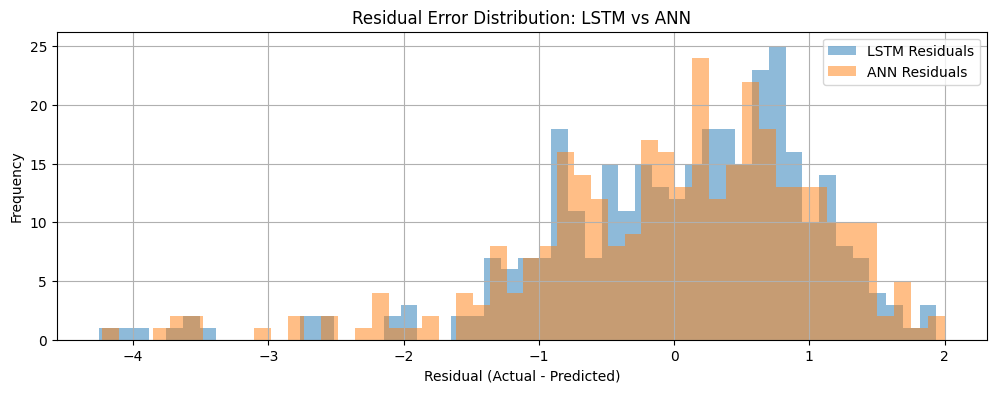

In [41]:
plt.figure(figsize=(12, 4))
plt.hist(inverse_true - inverse_pred_lstm, bins=50, alpha=0.5, label='LSTM Residuals')
plt.hist(inverse_true - inverse_pred_ann, bins=50, alpha=0.5, label='ANN Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.title('Residual Error Distribution: LSTM vs ANN')
plt.show()


LSTM Residuals - Mean: 0.022239869925389313, Std: 1.0367937216995273
ANN Residuals - Mean: -0.00029707392751217055, Std: 1.0635963873618877


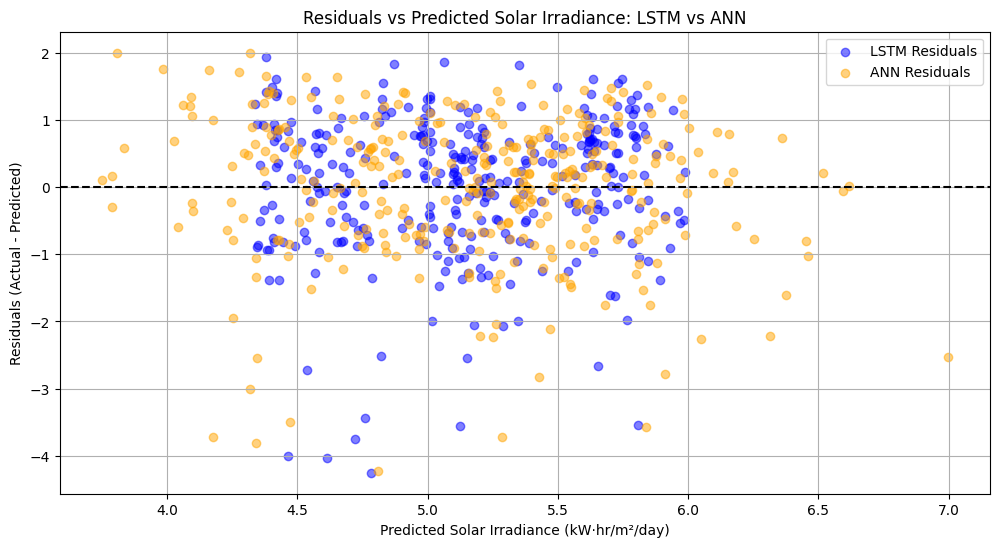

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Recalculate residuals for both models
lstm_residuals = inverse_true - inverse_pred_lstm
ann_residuals = inverse_true - inverse_pred_ann

# Calculate mean and standard deviation
lstm_mean_residual = np.mean(lstm_residuals)
lstm_std_residual = np.std(lstm_residuals)

ann_mean_residual = np.mean(ann_residuals)
ann_std_residual = np.std(ann_residuals)

print(f"LSTM Residuals - Mean: {lstm_mean_residual}, Std: {lstm_std_residual}")
print(f"ANN Residuals - Mean: {ann_mean_residual}, Std: {ann_std_residual}")

# Plot Residuals vs Predicted (Scatter)
plt.figure(figsize=(12, 6))
plt.scatter(inverse_pred_lstm, lstm_residuals, color='blue', alpha=0.5, label='LSTM Residuals')
plt.scatter(inverse_pred_ann, ann_residuals, color='orange', alpha=0.5, label='ANN Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Solar Irradiance (kW·hr/m²/day)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.title('Residuals vs Predicted Solar Irradiance: LSTM vs ANN')
plt.show()


In [44]:
# ⚡ Final real-world error metrics + R² comparison block (LSTM & ANN)

from sklearn.metrics import r2_score

# LSTM inverse transform and real-world metrics
y_pred_lstm_flat = y_pred.flatten()
y_test_flat = y_test.flatten()
dummy_feature = np.zeros((X_test.shape[0], 1))
X_test_last_features = X_test[:, -1, :-1]

inverse_input_pred_lstm = np.hstack([X_test_last_features, dummy_feature, y_pred_lstm_flat.reshape(-1, 1)])
inverse_input_true = np.hstack([X_test_last_features, dummy_feature, y_test_flat.reshape(-1, 1)])

inverse_pred_lstm = scaler.inverse_transform(inverse_input_pred_lstm)[:, -1]
inverse_true = scaler.inverse_transform(inverse_input_true)[:, -1]

real_mae_lstm = np.mean(np.abs(inverse_true - inverse_pred_lstm))
real_rmse_lstm = np.sqrt(np.mean((inverse_true - inverse_pred_lstm)**2))
r2_lstm = r2_score(inverse_true, inverse_pred_lstm)

# ANN inverse transform and real-world metrics
y_pred_ann_flat = y_pred_ann.flatten()
inverse_input_pred_ann = np.hstack([X_test_last_features, dummy_feature, y_pred_ann_flat.reshape(-1, 1)])

inverse_pred_ann = scaler.inverse_transform(inverse_input_pred_ann)[:, -1]

real_mae_ann = np.mean(np.abs(inverse_true - inverse_pred_ann))
real_rmse_ann = np.sqrt(np.mean((inverse_true - inverse_pred_ann)**2))
r2_ann = r2_score(inverse_true, inverse_pred_ann)

# Comparison DataFrame
import pandas as pd

comparison = pd.DataFrame({
    'Model': ['LSTM', 'ANN'],
    'MAE (kW·hr/m²/day)': [real_mae_lstm, real_mae_ann],
    'RMSE (kW·hr/m²/day)': [real_rmse_lstm, real_rmse_ann],
    'R²': [r2_lstm, r2_ann]
})

print(comparison)



  Model  MAE (kW·hr/m²/day)  RMSE (kW·hr/m²/day)        R²
0  LSTM            0.797227             1.037032  0.199075
1   ANN            0.817542             1.063596  0.157517
